In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
dtype_dict = {
    'id_mutation': 'str',
    'date_mutation': 'str',
    'numero_disposition': 'str',
    'nature_mutation': 'str',
    'valeur_fonciere': 'float64',
    'adresse_numero': 'float64',
    'adresse_suffixe': 'str',
    'adresse_nom_voie': 'str',
    'adresse_code_voie': 'str',
    'code_postal': 'str',
    'code_commune': 'str',
    'nom_commune': 'str',
    'code_departement': 'str',
    'ancien_code_commune': 'str',
    'ancien_nom_commune': 'str',
    'id_parcelle': 'str',
    'ancien_id_parcelle': 'str',
    'numero_volume': 'str',
    'lot1_numero': 'str',
    'lot1_surface_carrez': 'float64',
    'lot2_numero': 'str',
    'lot2_surface_carrez': 'float64',
    'lot3_numero': 'str',
    'lot3_surface_carrez': 'float64',
    'lot4_numero': 'str',
    'lot4_surface_carrez': 'float64',
    'lot5_numero': 'str',
    'lot5_surface_carrez': 'float64',
    'nombre_lots': 'int32',
    'code_type_local': 'str',
    'type_local': 'str',
    'surface_reelle_bati': 'float64',
    'nombre_pieces_principales': 'float64',
    'code_nature_culture': 'str',
    'nature_culture': 'str',
    'code_nature_culture_speciale': 'str',
    'nature_culture_speciale': 'str',
    'surface_terrain': 'float64',
    'longitude': 'float64',
    'latitude': 'float64'
}

In [35]:
data = pd.read_csv("data/full_2022.csv",dtype=dtype_dict)
data = data.dropna(subset=['longitude', 'latitude'])
data = data.drop_duplicates()

In [36]:
code = pd.read_excel('data\insee_rp_hist_1968.xlsx')
code

,codgeo,libgeo,an,p_pop
0,01001,L'Abergement-Clémenciat,2020,806.0
1,01002,L'Abergement-de-Varey,2020,262.0
2,01004,Ambérieu-en-Bugey,2020,14288.0
3,01005,Ambérieux-en-Dombes,2020,1782.0
4,01006,Ambléon,2020,113.0
...,...,...,...,...
34940,97613,M'Tsangamouji,2020,NaN
34941,97614,Ouangani,2020,NaN
34942,97615,Pamandzi,2020,NaN
34943,97616,Sada,2020,NaN


In [37]:
data["nature_mutation"].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir', 'Adjudication', 'Expropriation'],
      dtype=object)

In [38]:
sampled_data = data
sampled_data = sampled_data[sampled_data["nature_mutation"].isin(["Vente","Vente en l'état futur d'achèvement"])]
sampled_data = sampled_data[(sampled_data["nombre_lots"] == 0) | (sampled_data["nombre_lots"] == 1)]
sampled_data = sampled_data[(sampled_data['surface_reelle_bati'].notna()) & (sampled_data['surface_reelle_bati'] != 0)]
sampled_data = sampled_data[(sampled_data['valeur_fonciere'].notna()) & (sampled_data['valeur_fonciere'] != 0)]
sampled_data['code_departement'] = sampled_data['code_departement'].replace(['2A', '2B'], '02')


In [39]:
sampled_data = sampled_data.dropna(subset=['valeur_fonciere'])
columns_to_drop = ["lot1_numero", "lot2_numero", "lot3_numero", "lot4_numero", "lot5_numero","ancien_code_commune",
                   "ancien_nom_commune","adresse_numero","adresse_suffixe","id_parcelle","ancien_id_parcelle","code_type_local",
                   "numero_volume","code_nature_culture_speciale","nature_culture_speciale","code_nature_culture",
                   "code_nature_culture","numero_disposition","id_mutation","lot2_surface_carrez","lot3_surface_carrez","lot4_surface_carrez",
                   "lot5_surface_carrez","adresse_nom_voie","adresse_code_voie","nom_commune","nombre_lots",
                   "lot1_surface_carrez","nature_culture","code_postal"]
    #"code_commune"
sampled_data = sampled_data.drop(columns=columns_to_drop)

In [40]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1220352 entries, 0 to 4617578
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1220352 non-null  object 
 1   nature_mutation            1220352 non-null  object 
 2   valeur_fonciere            1220352 non-null  float64
 3   code_commune               1220352 non-null  object 
 4   code_departement           1220352 non-null  object 
 5   type_local                 1220352 non-null  object 
 6   surface_reelle_bati        1220352 non-null  float64
 7   nombre_pieces_principales  1220352 non-null  float64
 8   surface_terrain            871221 non-null   float64
 9   longitude                  1220352 non-null  float64
 10  latitude                   1220352 non-null  float64
dtypes: float64(6), object(5)
memory usage: 111.7+ MB


In [41]:
sampled_data['latitude'] = sampled_data['latitude'].astype(float)
sampled_data['longitude'] = sampled_data['longitude'].astype(float)


sampled_data["surface_terrain"] = sampled_data["surface_terrain"].fillna(0)

sampled_data["valeur_fonciere"] = sampled_data["valeur_fonciere"].astype(str).apply(lambda x: x.replace(",", ".")).astype(float)

sampled_data["Prix_m"] = sampled_data["valeur_fonciere"] / sampled_data["surface_reelle_bati"]
sampled_data["Prix_m"] = sampled_data["Prix_m"].apply(lambda x: round(x))

sampled_data['latitude_r'] = np.deg2rad(sampled_data['latitude'])
sampled_data['longitude_r'] = np.deg2rad(sampled_data['longitude'])
sampled_data=sampled_data[sampled_data.latitude.notna()]
sampled_data=sampled_data[sampled_data.code_departement.notna()]

sampled_data=sampled_data.sort_values(by = ['latitude','longitude'])
sampled_data=sampled_data.drop(columns=['latitude','longitude'])
sampled_data=sampled_data.reset_index(drop=True)


In [42]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220352 entries, 0 to 1220351
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1220352 non-null  object 
 1   nature_mutation            1220352 non-null  object 
 2   valeur_fonciere            1220352 non-null  float64
 3   code_commune               1220352 non-null  object 
 4   code_departement           1220352 non-null  object 
 5   type_local                 1220352 non-null  object 
 6   surface_reelle_bati        1220352 non-null  float64
 7   nombre_pieces_principales  1220352 non-null  float64
 8   surface_terrain            1220352 non-null  float64
 9   Prix_m                     1220352 non-null  int64  
 10  latitude_r                 1220352 non-null  float64
 11  longitude_r                1220352 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 111.7+ MB


In [43]:
sampled_data = sampled_data[sampled_data['Prix_m'] <= 75000]

In [44]:
def filter_outliers(df):
    grouped = df.groupby('code_commune')

    def filter_group(group):
        Q1 = group['Prix_m'].quantile(0.25)
        Q3 = group['Prix_m'].quantile(0.75)
        IQR = Q3 - Q1
        return group[(group['Prix_m'] >= (Q1 - 1.5 * IQR)) & (group['Prix_m'] <= (Q3 + 1.5 * IQR))]

    return grouped.apply(filter_group).reset_index(drop=True)

sampled_data = filter_outliers(sampled_data)


In [45]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081423 entries, 0 to 1081422
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1081423 non-null  object 
 1   nature_mutation            1081423 non-null  object 
 2   valeur_fonciere            1081423 non-null  float64
 3   code_commune               1081423 non-null  object 
 4   code_departement           1081423 non-null  object 
 5   type_local                 1081423 non-null  object 
 6   surface_reelle_bati        1081423 non-null  float64
 7   nombre_pieces_principales  1081423 non-null  float64
 8   surface_terrain            1081423 non-null  float64
 9   Prix_m                     1081423 non-null  int64  
 10  latitude_r                 1081423 non-null  float64
 11  longitude_r                1081423 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 99.0+ MB


In [46]:
import pandas as pd

# Merge the DataFrames
sampled_data = pd.merge(sampled_data, code[['codgeo', 'p_pop']], left_on='code_commune', right_on='codgeo', how='left')

# 'merged_data' now has the 'p_pop' column from 'code' DataFrame added to it.

sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081423 entries, 0 to 1081422
Data columns (total 14 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1081423 non-null  object 
 1   nature_mutation            1081423 non-null  object 
 2   valeur_fonciere            1081423 non-null  float64
 3   code_commune               1081423 non-null  object 
 4   code_departement           1081423 non-null  object 
 5   type_local                 1081423 non-null  object 
 6   surface_reelle_bati        1081423 non-null  float64
 7   nombre_pieces_principales  1081423 non-null  float64
 8   surface_terrain            1081423 non-null  float64
 9   Prix_m                     1081423 non-null  int64  
 10  latitude_r                 1081423 non-null  float64
 11  longitude_r                1081423 non-null  float64
 12  codgeo                     1046664 non-null  object 
 13  p_pop       

In [47]:
sampled_data.pivot_table(values='valeur_fonciere', index='type_local', columns='nature_mutation', aggfunc='size')

nature_mutation,Vente,Vente en l'état futur d'achèvement
type_local,,
Appartement,301093,7795
Local industriel. commercial ou assimilé,74716,816
Maison,696599,404


In [48]:
appart_old=sampled_data[(sampled_data['type_local']=='Appartement') & (sampled_data['nature_mutation']=='Vente') & (sampled_data['Prix_m']>100) & (sampled_data['valeur_fonciere']>20000)]
appart_old.reset_index(drop=True,inplace=True)
maison_old=sampled_data[(sampled_data['type_local']=='Maison') & (sampled_data['nature_mutation']=='Vente')]
maison_old=maison_old[(maison_old['valeur_fonciere']>20000)&(maison_old['Prix_m']>500)&(maison_old['surface_reelle_bati']>9)]
maison_old.reset_index(drop=True,inplace=True)
#local_old =sampled_data[(sampled_data['type_local']=='Local industriel. commercial ou assimilé') & (sampled_data['nature_mutation']=='Vente')]
#local_old.reset_index(drop=True,inplace=True)
appart_new=sampled_data[(sampled_data['type_local']=='Appartement') & (sampled_data['nature_mutation']=='Vente en l\'état futur d\'achèvement')]
appart_new.reset_index(drop=True,inplace=True)

In [49]:
appart_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297944 entries, 0 to 297943
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              297944 non-null  object 
 1   nature_mutation            297944 non-null  object 
 2   valeur_fonciere            297944 non-null  float64
 3   code_commune               297944 non-null  object 
 4   code_departement           297944 non-null  object 
 5   type_local                 297944 non-null  object 
 6   surface_reelle_bati        297944 non-null  float64
 7   nombre_pieces_principales  297944 non-null  float64
 8   surface_terrain            297944 non-null  float64
 9   Prix_m                     297944 non-null  int64  
 10  latitude_r                 297944 non-null  float64
 11  longitude_r                297944 non-null  float64
 12  codgeo                     269275 non-null  object 
 13  p_pop                      26

## ALL ##

In [50]:
from sklearn.neighbors import BallTree
import os
import pickle

def save_obj(obj, name):
    directory = "data/"
    if not os.path.exists(directory):
        os.makedirs(directory)

    with open(os.path.join(directory, name + '.pkl'), 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

models = {}

all_properties = pd.concat([appart_old, maison_old,appart_new])

all_properties['distance_moyenne'] = np.zeros(len(all_properties))
all_properties['indices_voisins'] = np.zeros(len(all_properties))

model_all = BallTree(all_properties[['latitude_r', 'longitude_r']].values, leaf_size=2, metric='haversine')
models['france_entiere'] = model_all

save_obj(models['france_entiere'], 'france_entiere')


In [51]:
all_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977145 entries, 0 to 7794
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              977145 non-null  object 
 1   nature_mutation            977145 non-null  object 
 2   valeur_fonciere            977145 non-null  float64
 3   code_commune               977145 non-null  object 
 4   code_departement           977145 non-null  object 
 5   type_local                 977145 non-null  object 
 6   surface_reelle_bati        977145 non-null  float64
 7   nombre_pieces_principales  977145 non-null  float64
 8   surface_terrain            977145 non-null  float64
 9   Prix_m                     977145 non-null  int64  
 10  latitude_r                 977145 non-null  float64
 11  longitude_r                977145 non-null  float64
 12  codgeo                     945981 non-null  object 
 13  p_pop                      945981 no

In [52]:
import time
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import BallTree

all_properties = pd.concat([appart_old, maison_old])

model_all = BallTree(all_properties[['latitude_r', 'longitude_r']].values, leaf_size=2, metric='haversine')

all_data = []

for property_type, data_old in [('appart', appart_old), ('maison', maison_old)]:
    start = time.time()

    k_nearest = min(10, len(data_old))

    dist, indices = model_all.query(data_old[['latitude_r', 'longitude_r']].values, k=k_nearest)

    data_old['distance_moyenne'] = np.mean(dist[:, 1:] * 6341, axis=1)

    prix_moyen_quartier = pd.DataFrame({'Prix_m': np.zeros(len(data_old))})

    for i in range(1, k_nearest):
        valid_indices = indices[:, i] < len(all_properties)
        prix_valides = all_properties.iloc[indices[valid_indices, i]]['Prix_m']
        prix_moyen_quartier.loc[valid_indices, 'Prix_m'] += prix_valides.values

    diviseur = max(1, k_nearest - 1)
    prix_moyen_quartier /= diviseur
    data_old['Prix_moyen_du_quartier'] = prix_moyen_quartier['Prix_m']

    stop = time.time()
    print(f"Type: {property_type}, Time taken: {stop - start} seconds")

    all_data.append(data_old)

combined_data = pd.concat(all_data)

C:\Users\arthu\AppData\Local\Temp\ipykernel_21788\585818706.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_old['distance_moyenne'] = np.mean(dist[:, 1:] * 6341, axis=1)
C:\Users\arthu\AppData\Local\Temp\ipykernel_21788\585818706.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_old['Prix_moyen_du_quartier'] = prix_moyen_quartier['Prix_m']


Type: appart, Time taken: 40.84170579910278 seconds
Type: maison, Time taken: 79.66803741455078 seconds


In [53]:
import pickle 
directory = "data"
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the BallTree model using pickle
model_filename = os.path.join(directory, "balltree_model_all.pkl")
with open(model_filename, 'wb') as file:
    pickle.dump(model_all, file)

print(f"BallTree model saved to {model_filename}")


BallTree model saved to data\balltree_model_all.pkl


## graph (start here) ##

In [54]:
all = combined_data

In [55]:
# Group by 'code_commune' and count the number of sales
commune_sales_count = all.groupby('code_commune').size()

# Map the count back to the original DataFrame
all['number_of_sales'] = all['code_commune'].map(commune_sales_count)

# This line is optional, to show the updated DataFrame
print(all[['code_commune', 'number_of_sales']])


       code_commune  number_of_sales
0             01004              183
1             01004              183
2             01004              183
3             01004              183
4             01004              183
...             ...              ...
671401        97424               32
671402        97424               32
671403        97424               32
671404        97424               32
671405        97424               32

[969350 rows x 2 columns]


In [56]:
all[all['code_commune'] == 74056]



,date_mutation,nature_mutation,valeur_fonciere,code_commune,code_departement,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r,codgeo,p_pop,distance_moyenne,Prix_moyen_du_quartier,number_of_sales


In [57]:
all.head()

,date_mutation,nature_mutation,valeur_fonciere,code_commune,code_departement,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r,codgeo,p_pop,distance_moyenne,Prix_moyen_du_quartier,number_of_sales
0,2022-11-02,Vente,181000.0,01004,01,Appartement,91.0,4.0,0.0,1989,0.801983,0.093649,01004,14288.0,0.145538,3401.666667,183
1,2022-07-22,Vente,155000.0,01004,01,Appartement,68.0,3.0,0.0,2279,0.801986,0.093576,01004,14288.0,0.243429,3146.333333,183
2,2022-12-05,Vente,349000.0,01004,01,Appartement,70.0,3.0,914.0,4986,0.802037,0.093587,01004,14288.0,0.176317,3315.111111,183
3,2022-12-05,Vente,349000.0,01004,01,Appartement,98.0,4.0,914.0,3561,0.802037,0.093587,01004,14288.0,0.176317,3315.111111,183
4,2022-07-06,Vente,78000.0,01004,01,Appartement,40.0,2.0,0.0,1950,0.802057,0.093249,01004,14288.0,0.186236,2660.444444,183


In [58]:
all = all.drop(columns=['code_commune'])
all = all.drop(columns=['codgeo'])

In [59]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969350 entries, 0 to 671405
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              969350 non-null  object 
 1   nature_mutation            969350 non-null  object 
 2   valeur_fonciere            969350 non-null  float64
 3   code_departement           969350 non-null  object 
 4   type_local                 969350 non-null  object 
 5   surface_reelle_bati        969350 non-null  float64
 6   nombre_pieces_principales  969350 non-null  float64
 7   surface_terrain            969350 non-null  float64
 8   Prix_m                     969350 non-null  int64  
 9   latitude_r                 969350 non-null  float64
 10  longitude_r                969350 non-null  float64
 11  p_pop                      938450 non-null  float64
 12  distance_moyenne           969350 non-null  float64
 13  Prix_moyen_du_quartier     969350 

In [60]:
all['Prix_moyen_du_quartier'].unique()

array([3401.66666667, 3146.33333333, 3315.11111111, ..., 6464.11111111,
       7119.22222222, 6380.22222222])

In [61]:
all = all.drop(["date_mutation", "nature_mutation"], axis=1)

In [62]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969350 entries, 0 to 671405
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   valeur_fonciere            969350 non-null  float64
 1   code_departement           969350 non-null  object 
 2   type_local                 969350 non-null  object 
 3   surface_reelle_bati        969350 non-null  float64
 4   nombre_pieces_principales  969350 non-null  float64
 5   surface_terrain            969350 non-null  float64
 6   Prix_m                     969350 non-null  int64  
 7   latitude_r                 969350 non-null  float64
 8   longitude_r                969350 non-null  float64
 9   p_pop                      938450 non-null  float64
 10  distance_moyenne           969350 non-null  float64
 11  Prix_moyen_du_quartier     969350 non-null  float64
 12  number_of_sales            969350 non-null  int64  
dtypes: float64(9), int64(2), object(2)

In [63]:
from sklearn.preprocessing import OneHotEncoder
a = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')


In [64]:
a_transform = a.fit_transform(all[["type_local"]])

In [65]:
a_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969350 entries, 0 to 671405
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   type_local_Appartement  969350 non-null  float64
 1   type_local_Maison       969350 non-null  float64
dtypes: float64(2)
memory usage: 22.2 MB


In [66]:
all = pd.concat([all,a_transform],axis=1).drop(columns=['type_local'])

In [67]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969350 entries, 0 to 671405
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   valeur_fonciere            969350 non-null  float64
 1   code_departement           969350 non-null  object 
 2   surface_reelle_bati        969350 non-null  float64
 3   nombre_pieces_principales  969350 non-null  float64
 4   surface_terrain            969350 non-null  float64
 5   Prix_m                     969350 non-null  int64  
 6   latitude_r                 969350 non-null  float64
 7   longitude_r                969350 non-null  float64
 8   p_pop                      938450 non-null  float64
 9   distance_moyenne           969350 non-null  float64
 10  Prix_moyen_du_quartier     969350 non-null  float64
 11  number_of_sales            969350 non-null  int64  
 12  type_local_Appartement     969350 non-null  float64
 13  type_local_Maison          969350 

In [68]:
all = all.dropna()

In [69]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 938450 entries, 0 to 671405
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   valeur_fonciere            938450 non-null  float64
 1   code_departement           938450 non-null  object 
 2   surface_reelle_bati        938450 non-null  float64
 3   nombre_pieces_principales  938450 non-null  float64
 4   surface_terrain            938450 non-null  float64
 5   Prix_m                     938450 non-null  int64  
 6   latitude_r                 938450 non-null  float64
 7   longitude_r                938450 non-null  float64
 8   p_pop                      938450 non-null  float64
 9   distance_moyenne           938450 non-null  float64
 10  Prix_moyen_du_quartier     938450 non-null  float64
 11  number_of_sales            938450 non-null  int64  
 12  type_local_Appartement     938450 non-null  float64
 13  type_local_Maison          938450 

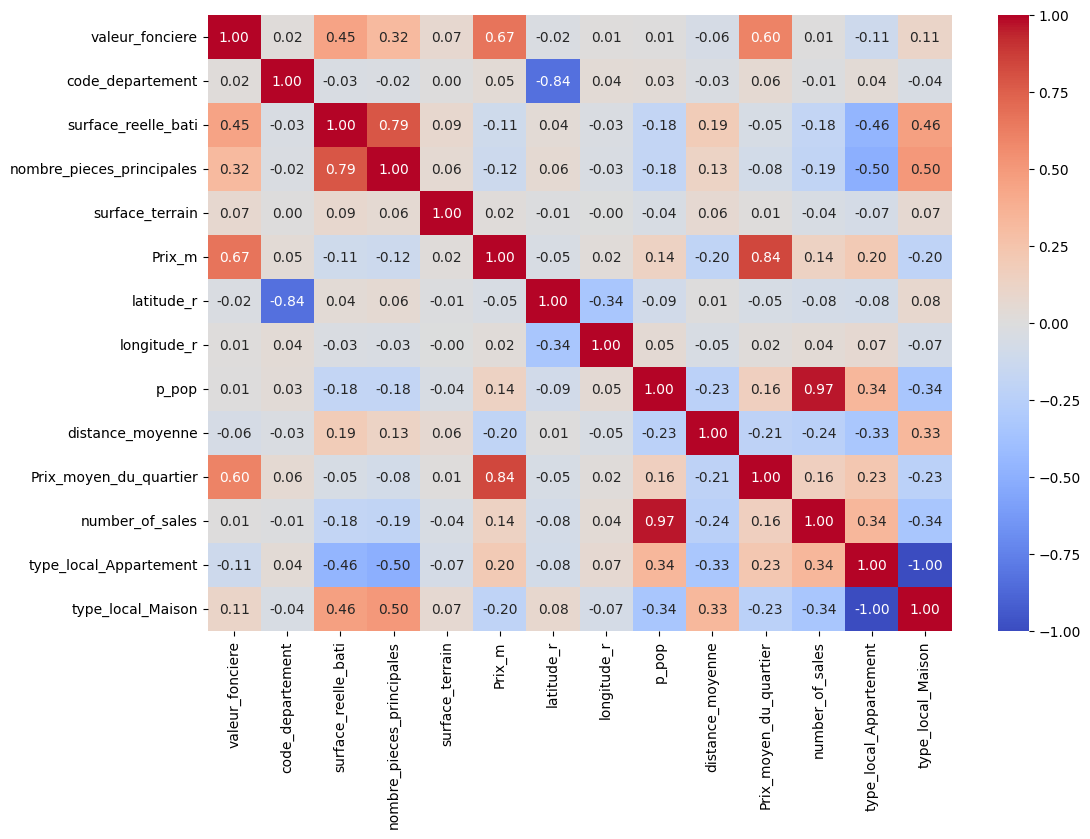

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'all'
# Replace 'all' with the actual name of your DataFrame if it's different
correlation_matrix = all.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

In [71]:
directory = "data"
if not os.path.exists(directory):
    os.makedirs(directory)
    
combined_csv_filename = os.path.join(directory, "combined_properties_france.csv")
combined_data.to_csv(combined_csv_filename, index=False, header=True)

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# Separate target variable and features
y = all["Prix_m"].values
X = all.drop(columns=["valeur_fonciere", "Prix_m"]).values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
forest = RandomForestRegressor()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50],
    'min_samples_split': [8],
    'max_depth': [None],
    'min_samples_leaf' :[1],
    'min_weight_fraction_leaf' :[0],
    'max_features': ['sqrt']
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Extract the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Optionally, evaluate the best model on test data
#test_score = best_model.score(X_test, y_test)  # Uncomment to evaluate

# Save the scaler and the best model to disk
with open('data/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('data/model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Optionally, print the best parameters and the test score
print("Best Parameters:", best_params)
#print("Test Score:", test_score)  # Uncomment to print test score

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0, 'n_estimators': 50}


## TEST ##

In [1]:
import pickle

with open('data/model.pkl', 'rb') as model_file:
    forest = pickle.load(model_file)

with open('data/scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

In [2]:
import numpy as np
import pandas as pd
predictions = forest.predict(X_test)

y_test_adjusted = y_test  +1e-6

percentage_error = np.abs(predictions - y_test_adjusted) / y_test_adjusted * 100

high_error_indices = [i for i, error in enumerate(percentage_error) if error > 0]

high_error_predictions_scaled = X_test[high_error_indices]

high_error_predictions = scaler.inverse_transform(high_error_predictions_scaled)

columns = all.drop(columns=["valeur_fonciere", "Prix_m"]).columns
high_error_df = pd.DataFrame(high_error_predictions, columns=columns)

high_error_df['Actual'] = y_test_adjusted[high_error_indices]
high_error_df['Predicted'] = predictions[high_error_indices]
high_error_df['Percentage Error'] = percentage_error[high_error_indices]

NameError: name 'X_test' is not defined

In [ ]:
xlsx_file_path = 'high_error_data.xlsx'

high_error_df.to_excel(xlsx_file_path, index=False)

xlsx_file_path

'high_error_data.xlsx'

In [ ]:
high_error_df.info()
#854216

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187690 entries, 0 to 187689
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   code_departement           187690 non-null  float64
 1   surface_reelle_bati        187690 non-null  float64
 2   nombre_pieces_principales  187690 non-null  float64
 3   surface_terrain            187690 non-null  float64
 4   latitude_r                 187690 non-null  float64
 5   longitude_r                187690 non-null  float64
 6   p_pop                      187690 non-null  float64
 7   distance_moyenne           187690 non-null  float64
 8   Prix_moyen_du_quartier     187690 non-null  float64
 9   number_of_sales            187690 non-null  float64
 10  type_local_Appartement     187690 non-null  float64
 11  type_local_Maison          187690 non-null  float64
 12  Actual                     187690 non-null  float64
 13  Predicted                  18

## GRAPH + ANALYST ##

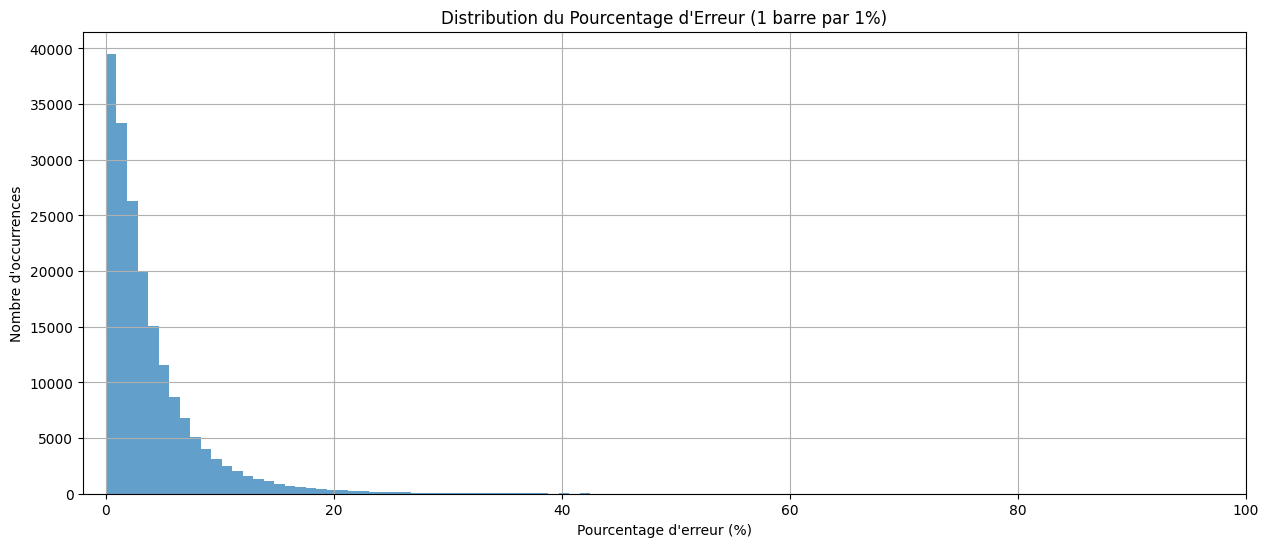

In [ ]:
y_pred = forest.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np


y_pred = np.random.normal(loc=y_test, scale=100, size=len(y_test))
y_test_adjusted = y_test  +1e-6

percentage_error = np.abs(y_pred - y_test_adjusted) / y_test_adjusted * 100

plot_data = {
    "Prix_m": percentage_error,
    "Percentage_Error": percentage_error
}


filtre = (percentage_error >= 0) & (percentage_error <= 100)
percentage_error_filtre = percentage_error[filtre]

plt.figure(figsize=(15, 6))
plt.hist(percentage_error_filtre, bins=100, alpha=0.7)
plt.title("Distribution du Pourcentage d'Erreur (1 barre par 1%)")
plt.xlabel("Pourcentage d'erreur (%)")
plt.ylabel("Nombre d'occurrences")
plt.xlim(-2, 100)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = forest.predict(X_test)

y_test_adjusted = y_test  +1e-6

# Calculer le pourcentage d'erreur
percentage_error_adjusted = np.abs(y_pred - y_test_adjusted) / y_test_adjusted * 100

# Calcul de l'erreur moyenne et médiane
mean_error_adjusted = np.mean(percentage_error_adjusted)
median_error_adjusted = np.median(percentage_error_adjusted)
r2 = r2_score(y_test, y_pred)

print("Erreur moyenne en pourcentage (avec ajustement) :", mean_error_adjusted)
print("Erreur médiane en pourcentage (avec ajustement) :", median_error_adjusted)
print("R^2 Score:", r2)

Erreur moyenne en pourcentage (avec ajustement) : 27.806018418561326
Erreur médiane en pourcentage (avec ajustement) : 15.986920706792413
R^2 Score: 0.8226404178213972


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = forest.predict(X_test)

y_test_adjusted = y_test  +1e-6

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 1118799.4677423849
Mean Absolute Error (MAE): 626.1696496366774
R^2 Score: 0.8226404178213972


## AI APLICATION ##

In [3]:
from joblib import load
model_all = load('data/france_entiere.pkl')

In [4]:
def find_nearest_properties_mean(latitude, longitude, model, all_properties, property_type, k=10, max_attempts=10):
    attempt = 0
    mean_price = None

    while attempt < max_attempts:
        # Query the model for nearest properties
        dist, indices = model.query(np.array([[latitude, longitude]]), k=k)

        # Get the nearest properties
        nearest_properties = all_properties.iloc[indices[0]]

        # Filter properties by type
        filtered_properties = nearest_properties[nearest_properties['type_local'] == property_type]

        # Check if there are at least 10 properties
        if len(filtered_properties) >= 10:
            # Calculate average price based on the 10 nearest properties of the specified type
            mean_price = filtered_properties.head(10)['Prix_m'].mean()
            break
        else:
            # Increase k by 100 for the next attempt
            k += 20
            attempt += 1

    return mean_price


In [5]:
def calculate_distance_moyenne(latitude, longitude, model, k=10):
    
    # Query the model for nearest properties
    dist, indices = model.query(np.array([[latitude, longitude]]), k=k)

    # Calculate the mean distance (excluding the first element which is zero)
    mean_distance = np.mean(dist[0][1:]) * 6371 # Convert to meters

    return mean_distance


In [6]:
import numpy as np
import pandas as pd
import pickle
from sklearn.neighbors import BallTree

# Load scaler and model
with open('data/scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('data/model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load your BallTree model and properties data
with open('data/balltree_model_all.pkl', 'rb') as balltree_file:
    balltree_model = pickle.load(balltree_file)

properties_data = pd.read_csv('data/combined_properties_france.csv')

s1 = 43.643516540527344
s2 = 5.097583293914795

a1 = 44.636693
a2 = -1.197042

c1 = 45.92759323120117
c2 = 6.866420745849609

# Convert coordinates to radians
latitude_r = np.deg2rad(c1)
longitude_r = np.deg2rad(c2)

# Use the functions to get the needed data
Prix_moyen_du_quartier = find_nearest_properties_mean(latitude_r, longitude_r, balltree_model, properties_data, "Maison")
distance_moyenne = calculate_distance_moyenne(latitude_r, longitude_r, balltree_model)


# Other property details arcachon
# surface_reelle_bati = 91
# surface_terrain = 450
# nombre_pieces_principales = 5
# p_pop = 26269
# number_of_sales = 457

#salon 
# Other property details
# surface_reelle_bati = 170
# surface_terrain = 240
# nombre_pieces_principales = 6
# p_pop = 45009
# number_of_sales = 517

#Cham
surface_reelle_bati = 285
surface_terrain = 1488
nombre_pieces_principales = 7
p_pop = 8644
number_of_sales = 309

# Prepare data for prediction
data_for_prediction = {
    'code_departement': [33],
    'surface_reelle_bati': [surface_reelle_bati],
    "nombre_pieces_principales": [nombre_pieces_principales],
    "surface_terrain": [surface_terrain],
    'latitude_r': [latitude_r],
    'longitude_r': [longitude_r],
    'p_pop': [p_pop],
    'distance_moyenne': [distance_moyenne],
    'Prix_moyen_du_quartier': [Prix_moyen_du_quartier],
    'type_local_Appartement': [0],
    'type_local_Maison': [1],
    'number_of_sales': [number_of_sales]
}

# Create DataFrame from the data
new_sample = pd.DataFrame(data_for_prediction)

# Scale the data
new_sample_scaled = scaler.transform(new_sample)

/var/folders/tz/clsh4w9x0wjbfnz7p3jr9xch0000gn/T/ipykernel_2816/2043126014.py:17: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_data = pd.read_csv('data/combined_properties_france.csv')
/Users/arthurdesmazures/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [7]:
properties_data[properties_data['code_commune'] == 74056]



,date_mutation,nature_mutation,valeur_fonciere,code_commune,code_departement,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r,codgeo,p_pop,distance_moyenne,Prix_moyen_du_quartier,number_of_sales
201515,2022-01-07,Vente,208336.0,74056,74,Appartement,79.0,3.0,0.0,2637,0.801069,0.119197,74056.0,8644.0,0.245629,8317.444444,309
201516,2022-02-18,Vente,245000.0,74056,74,Appartement,38.0,3.0,0.0,6447,0.801087,0.119456,74056.0,8644.0,0.283981,7671.666667,309
201517,2022-04-19,Vente,165000.0,74056,74,Appartement,22.0,2.0,0.0,7500,0.801088,0.119395,74056.0,8644.0,0.139831,7554.666667,309
201518,2022-08-03,Vente,270000.0,74056,74,Appartement,52.0,3.0,0.0,5192,0.801088,0.119395,74056.0,8644.0,0.139831,7554.666667,309
201519,2022-09-08,Vente,158000.0,74056,74,Appartement,19.0,1.0,0.0,8316,0.801088,0.119395,74056.0,8644.0,0.139831,7554.666667,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803750,2022-02-10,Vente,1400000.0,74056,74,Maison,140.0,4.0,163.0,10000,0.802574,0.120938,74056.0,8644.0,0.146516,7952.888889,309
803751,2022-01-14,Vente,1246000.0,74056,74,Maison,152.0,5.0,712.0,8197,0.802595,0.120932,74056.0,8644.0,0.192404,8153.222222,309
803752,2022-01-14,Vente,1246000.0,74056,74,Maison,152.0,5.0,878.0,8197,0.802595,0.120932,74056.0,8644.0,0.192404,8153.222222,309
803753,2022-05-25,Vente,1400000.0,74056,74,Maison,144.0,5.0,0.0,9722,0.802759,0.120970,74056.0,8644.0,0.461331,10716.888889,309


In [8]:
# Predict the price
predicted_price = model.predict(new_sample_scaled)

# Output the prediction
print("Predicted Price:", predicted_price[0])
print("Prix du bien", predicted_price * surface_reelle_bati)

Predicted Price: 13348.026892995891
Prix du bien [3804187.66450383]


In [9]:
Prix_moyen_du_quartier

12713.4

In [10]:
distance_moyenne

0.1976292084957498

In [11]:
import winsound

# Votre code ici

# Jouer un son à la fin
frequency = 2500  # en Hertz
duration = 500   # en millisecondes
winsound.Beep(frequency, duration)

ModuleNotFoundError: No module named 'winsound'